In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = pd.read_csv('C:/Users/Arvind Lakshmanan/Desktop/NU/IE 7275/Project/Passenger_booking_data.csv')
print(x.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               1      Internet  RoundTrip             21              12   
1               2      Internet  RoundTrip            262              19   
2               1      Internet  RoundTrip            112              20   
3               2      Internet  RoundTrip            243              22   
4               1      Internet  RoundTrip             96              31   

   flight_hour flight_day booking_origin  wants_extra_baggage  \
0            6        Tue      Australia                    0   
1            7        Sat    New Zealand                    1   
2            3        Sat    New Zealand                    0   
3           17        Wed          India                    1   
4            4        Sat    New Zealand                    0   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             7.21   
1           

In [2]:
y = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead','length_of_stay','flight_hour',
         'flight_day','booking_origin', 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals',
         'flight_duration','booking_complete']
a = x[y]
b = x['booking_complete']
a['sales_channel'] = a['sales_channel'].map({'Internet':1,'Mobile':0})
a['trip_type'] = a['trip_type'].map({'RoundTrip':1,'OneWay':0})
a.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,1,1,21,12,6,Tue,Australia,0,0,0,7.21,1
1,2,1,1,262,19,7,Sat,New Zealand,1,0,0,5.52,0
2,1,1,1,112,20,3,Sat,New Zealand,0,0,0,5.52,0
3,2,1,1,243,22,17,Wed,India,1,1,0,5.52,0
4,1,1,1,96,31,4,Sat,New Zealand,0,0,1,5.52,0


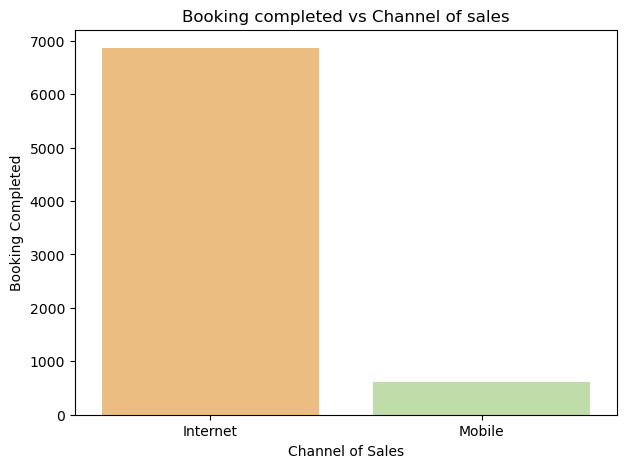

In [3]:
y = ['sales_channel','booking_complete']
a = x[y]

booking = a.groupby('sales_channel')['booking_complete'].sum()
cbooking = a.groupby('sales_channel')['booking_complete'].size()
plt.figure(figsize = (7,5))
sns.barplot(x = booking.index, y = booking.values, palette = 'Spectral')
plt.title ('Booking completed vs Channel of sales')
plt.xlabel('Channel of Sales')
plt.ylabel('Booking Completed')
plt.show()

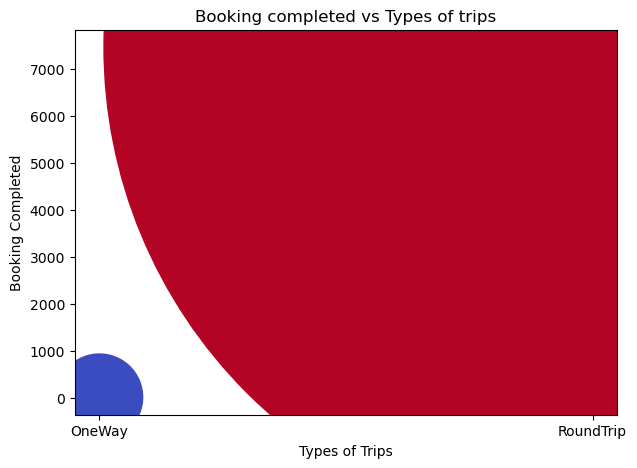

In [4]:
y = ['trip_type','booking_complete']
a = x[y]

booking = a.groupby('trip_type')['booking_complete'].sum()
cbooking = a.groupby('trip_type')['booking_complete'].size()
plt.figure(figsize = (7,5))
plt.scatter(booking.index, booking.values, s = cbooking*10, c = booking.values, cmap = 'coolwarm')
plt.title ('Booking completed vs Types of trips')
plt.xlabel('Types of Trips')
plt.ylabel('Booking Completed')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve

In [6]:
y = ['sales_channel','trip_type','booking_complete']
a = x[y].copy()

a = a.assign(sales_channel_ = LabelEncoder().fit_transform(a['sales_channel']),
            trip_type_ = LabelEncoder().fit_transform(a['trip_type']))
a.drop(['sales_channel','trip_type'], axis = 1, inplace = True)
a.head()

,booking_complete,sales_channel_,trip_type_
0,1,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [7]:
X = a.drop('booking_complete', axis = 1)
y = a['booking_complete']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 42)

For Linear Regression RMSE= 0.35817842953868523
For Linear Regression MSE= 0.1282917873867989
For Linear Regression R2_score= 0.0011683549896099876
                            OLS Regression Results                            
Dep. Variable:       booking_complete   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     52.00
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.80e-23
Time:                        14:08:34   Log-Likelihood:                -15416.
No. Observations:               39908   AIC:                         3.084e+04
Df Residuals:                   39905   BIC:                         3.086e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|    

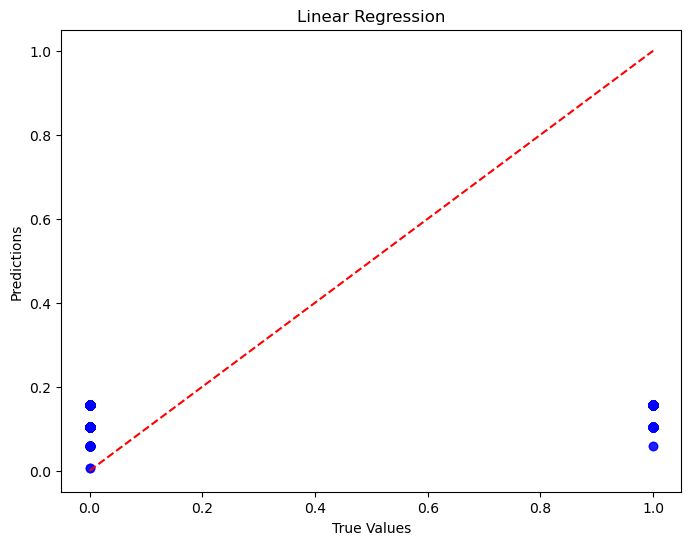

In [8]:
#Linear Regression
l = LinearRegression()
l.fit(X_train, y_train)
l_predictions = l.predict(X_valid)
l_rmse = np.sqrt(mean_squared_error(y_valid, l_predictions))
l_mse = mean_squared_error(y_valid, l_predictions)
l_r2 = r2_score(y_valid, l_predictions)
print("For Linear Regression RMSE=", l_rmse)
print("For Linear Regression MSE=", l_mse)
print("For Linear Regression R2_score=", l_r2)

X_train_intercept = sm.add_constant(X_train)
lr_model_sm = sm.OLS(y_train, X_train_intercept).fit()
print(lr_model_sm.summary())

#Plotting
plt.figure(figsize=(8,6))
plt.scatter(y_valid, l_predictions, color = 'blue', alpha = 0.5)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color = 'red', linestyle= '--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

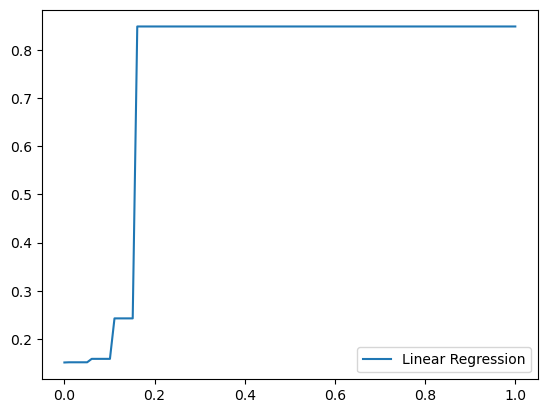

In [9]:
#Gains chart for Linear Regression
lr_gains = []
ths = np.linspace(0, 1, 100)
for threshold in ths:
    preds = np.where(l_predictions >= threshold, 1 ,0)
    cor = np.where((preds == y_valid))[0]
    lr_gains.append(len(cor)/len(y_valid))
plt.plot(ths, lr_gains, label = "Linear Regression")
plt.legend()
plt.show()


KNN Regression Results for k = 1
RMSE: 0.3890
MSE: 0.1513
R2 Score: -0.1783

KNN Regression Results for k = 2
RMSE: 0.3892
MSE: 0.1514
R2 Score: -0.1791

KNN Regression Results for k = 3
RMSE: 0.3931
MSE: 0.1545
R2 Score: -0.2028

KNN Regression Results for k = 4
RMSE: 0.3891
MSE: 0.1514
R2 Score: -0.1790

KNN Regression Results for k = 5
RMSE: 0.3976
MSE: 0.1581
R2 Score: -0.2310

KNN Regression Results for k = 6
RMSE: 0.3931
MSE: 0.1545
R2 Score: -0.2028

KNN Regression Results for k = 7
RMSE: 0.3624
MSE: 0.1313
R2 Score: -0.0224

KNN Regression Results for k = 8
RMSE: 0.3617
MSE: 0.1309
R2 Score: -0.0188

KNN Regression Results for k = 9
RMSE: 0.3650
MSE: 0.1332
R2 Score: -0.0372

KNN Regression Results for k = 10
RMSE: 0.3614
MSE: 0.1306
R2 Score: -0.0170

 Summary of KNN Regression-
Best RMSE is 0.361414 with k = 10
Best MSE is 0.130620 with k = 10
Best R2 score is -0.016962 with k = 10


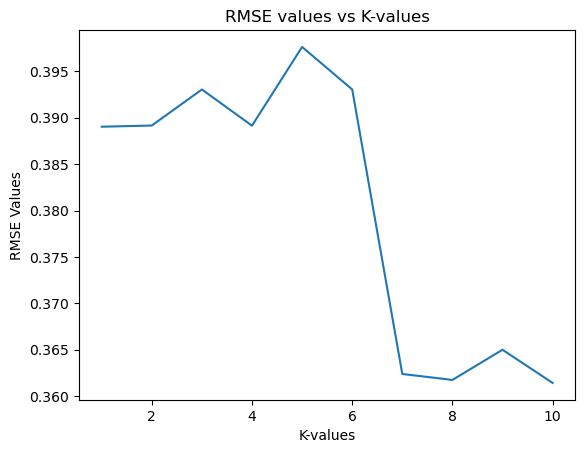

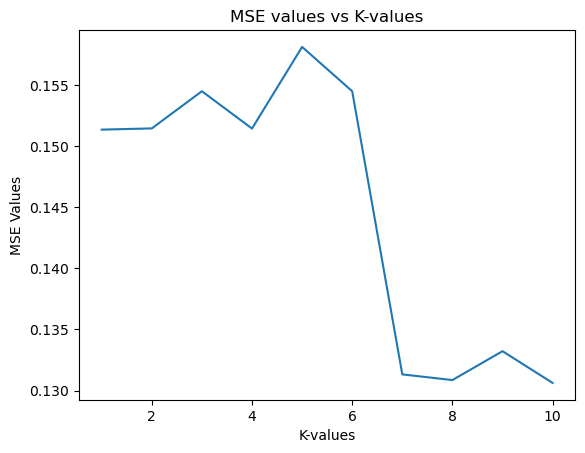

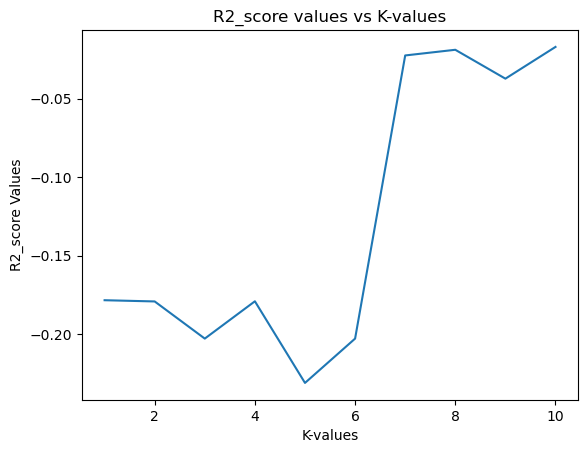

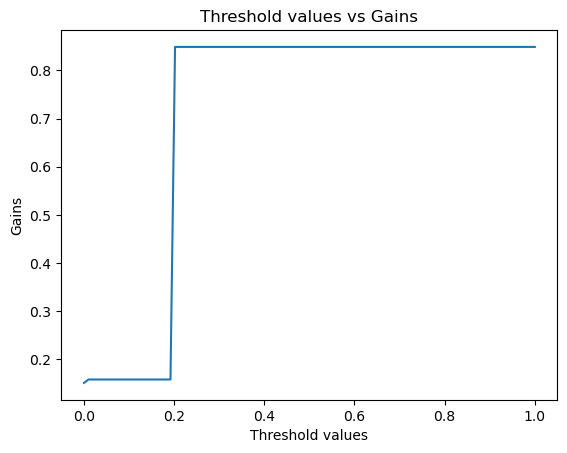

In [11]:
k_values = range(1, 11)
rmse_values = []
mse_values = []
r2_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_valid)
    knn_mse = mean_squared_error(y_valid, knn_preds)
    knn_rmse = np.sqrt(mean_squared_error(y_valid, knn_preds))
    knn_r2 = r2_score(y_valid, knn_preds)
    rmse_values.append(knn_rmse)
    mse_values.append(knn_mse)
    r2_values.append(knn_r2)
    
    print("\nKNN Regression Results for k = {}".format(k))
    print("RMSE: {:.4f}".format(knn_rmse))
    print("MSE: {:.4f}".format(knn_mse))
    print("R2 Score: {:.4f}".format(knn_r2))


print("\n Summary of KNN Regression-")
print("Best RMSE is {:4f} with k = {}".format(min(rmse_values), rmse_values.index(min(rmse_values))+ 1))
print("Best MSE is {:4f} with k = {}".format(min(mse_values), mse_values.index(min(mse_values))+ 1))
print("Best R2 score is {:4f} with k = {}".format(max(r2_values), r2_values.index(max(r2_values))+ 1))

#Plotting
plt.plot(k_values, rmse_values)
plt.xlabel('K-values')
plt.ylabel('RMSE Values')
plt.title('RMSE values vs K-values')
plt.show()

plt.plot(k_values, mse_values)
plt.xlabel('K-values')
plt.ylabel('MSE Values')
plt.title('MSE values vs K-values')
plt.show()

plt.plot(k_values, r2_values)
plt.xlabel('K-values')
plt.ylabel('R2_score Values')
plt.title('R2_score values vs K-values')
plt.show()

#Gains chart for KNN Regression
knn_g = []
th = np.linspace(0,1,100)
for threshold in th:
    pr = np.where(knn_preds >= threshold, 1, 0)
    cr = np.where((pr == y_valid))[0]
    knn_g.append(len(cr)/len(y_valid))
plt.plot(th,knn_g)
plt.xlabel('Threshold values')
plt.ylabel('Gains')
plt.title('Threshold values vs Gains')
plt.show()

For Tree Regression RMSE =  0.35819041651600325
For Tree Regression MSE =  0.12830037448390788
For Tree Regression R2 score =  0.0011014990785187528


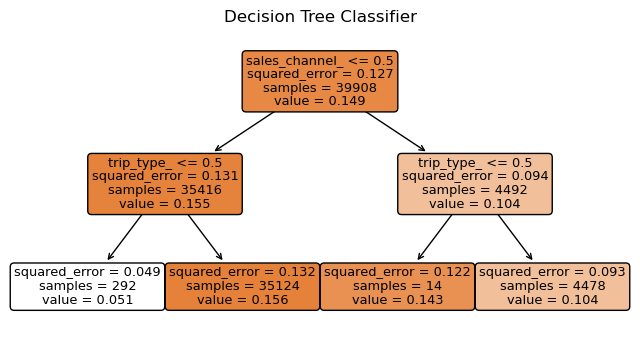

In [12]:
#Tree Regression
t = DecisionTreeRegressor()
t.fit(X_train, y_train)
t_preds = t.predict(X_valid)
t_rmse = np.sqrt(mean_squared_error(y_valid, t_preds))
t_mse = mean_squared_error(y_valid, t_preds)
t_r2 = r2_score(y_valid, t_preds)
print("For Tree Regression RMSE = ", t_rmse)
print("For Tree Regression MSE = ", t_mse)
print("For Tree Regression R2 score = ", t_r2)

#Plotting decision tree
plt.figure(figsize=(8,4))
plot_tree(t, filled = True, feature_names = X.columns, class_names = ['1','0'], rounded = True)
plt.title('Decision Tree Classifier')
plt.show()

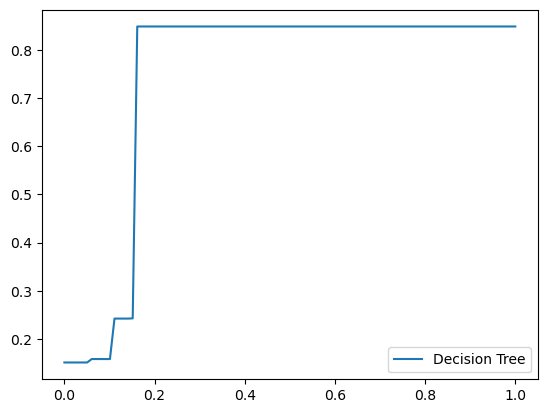

In [13]:
#Gains chart for Decision Tree
t_gains = []
th = np.linspace(0, 1, 100)
for threshold in th:
    preds = np.where(t_preds >= threshold, 1, 0)
    crt = np.where((preds == y_valid))[0]
    t_gains.append(len(crt)/len(y_valid))
plt.plot(th, t_gains, label = 'Decision Tree')
plt.legend()
plt.show()

Logistic Regression Accuracy =  0.8486518993685477
Logistic Regression Confusion Matrix =  [[8467    0]
 [1510    0]]
Logistic Regression Precision score =  1.0
Logistic Regression Recall score =  0.0
Logistic Regression F1 score =  0.0


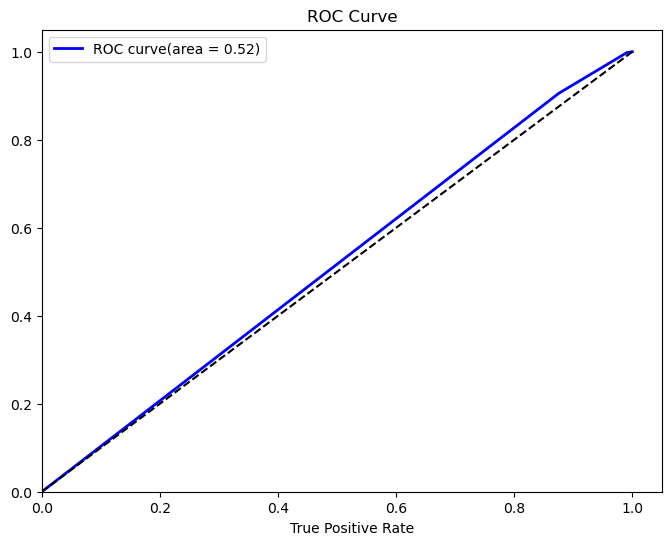

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_valid)
acc = accuracy_score(y_valid,lr_preds)
cm = confusion_matrix(y_valid,lr_preds)
prn = precision_score(y_valid,lr_preds, zero_division = True)
rs = recall_score(y_valid,lr_preds, zero_division = True)
f1 = f1_score(y_valid,lr_preds, zero_division = True)
print("Logistic Regression Accuracy = ", acc)
print("Logistic Regression Confusion Matrix = ", cm)
print("Logistic Regression Precision score = ", prn)
print("Logistic Regression Recall score = ", rs)
print("Logistic Regression F1 score = ", f1)

lr_probs = lr.predict_proba(X_valid)[:, 1]
fpr, tpr, ths = roc_curve(y_valid, lr_probs)
auc_ = auc(fpr,tpr)

#Plotting ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'b', lw = 2, label = f'ROC curve(area = {auc_:.2f})')
plt.plot([0,1],[0,1], color = 'black', linestyle = '--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'upper left')
plt.show()

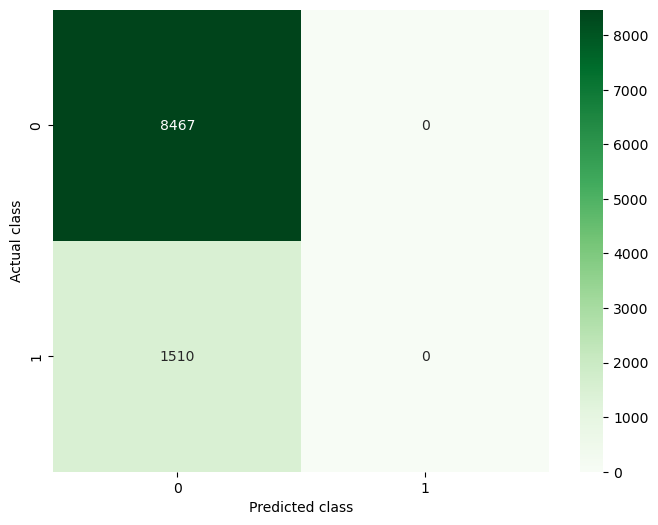

In [15]:
#Plotting confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

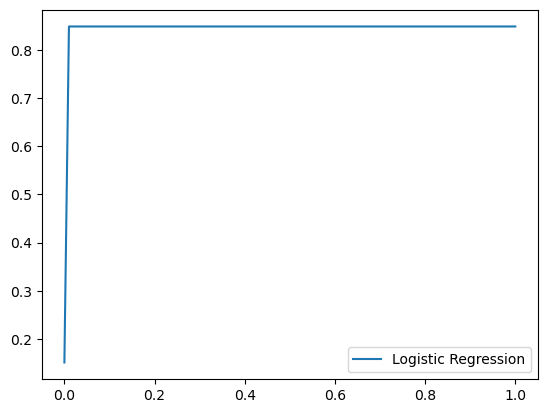

In [16]:
#Gains Chart
lr2_gains = []
th = np.linspace(0, 1, 100)
for threshold in th:
    preds = np.where(lr_preds >= threshold, 1, 0)
    crr = np.where((preds == y_valid))[0]
    lr2_gains.append(len(crr)/len(y_valid))
plt.plot(th, lr2_gains, label = 'Logistic Regression')
plt.legend()
plt.show()

In [17]:
#Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(16,32,64), activation = 'relu', solver = 'adam', random_state = 42)
nn.fit(X_train, y_train)
nn_preds = nn.predict(X_valid)
nn_acc = accuracy_score(y_valid, nn_preds)
nn_cm = confusion_matrix(y_valid, nn_preds)
nn_cr = classification_report(y_valid, nn_preds, zero_division = 1)
print("Neural Network Accuracy: {:.4f}".format(nn_acc))
print("Neural Network Confusion Matrix:\n", nn_cm)
print("Neural Network Classification Report:\n", nn_cr)

Neural Network Accuracy: 0.8487
Neural Network Confusion Matrix:
 [[8467    0]
 [1510    0]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8467
           1       1.00      0.00      0.00      1510

    accuracy                           0.85      9977
   macro avg       0.92      0.50      0.46      9977
weighted avg       0.87      0.85      0.78      9977



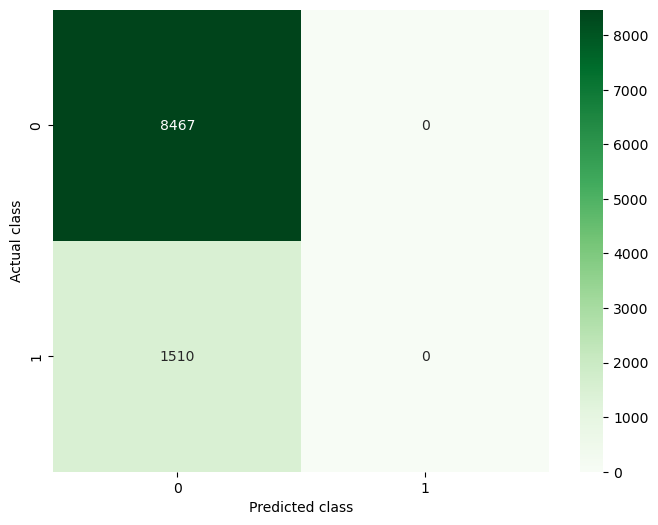

In [18]:
#Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(nn_cm, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

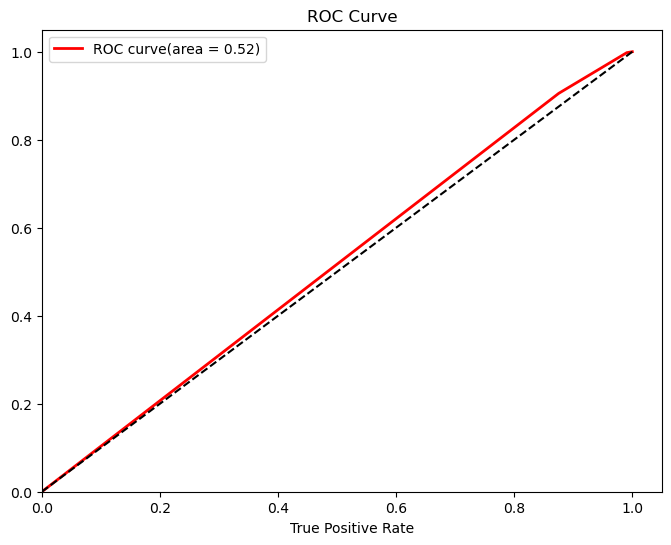

In [19]:
#Plotting ROC curve
fpr2, tpr2, _ = roc_curve(y_valid, nn.predict_proba(X_valid)[:,1])
auc_2 = auc(fpr2,tpr2)

plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2, color = 'r', lw = 2, label = f'ROC curve(area = {auc_:.2f})')
plt.plot([0,1],[0,1], color = 'black', linestyle = '--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'upper left')
plt.show()

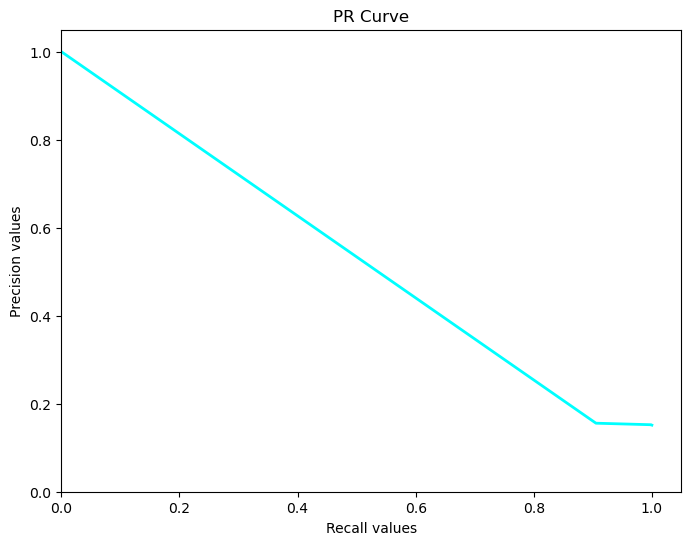

In [20]:
#Precision-Recall curve
prn2, rc, _ = precision_recall_curve(y_valid, nn.predict_proba(X_valid)[:,1])
plt.figure(figsize=(8,6))
plt.plot(rc, prn2, color = 'cyan', lw = 2)
plt.xlabel('Recall values')
plt.ylabel('Precision values')
plt.title('PR Curve')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.show()

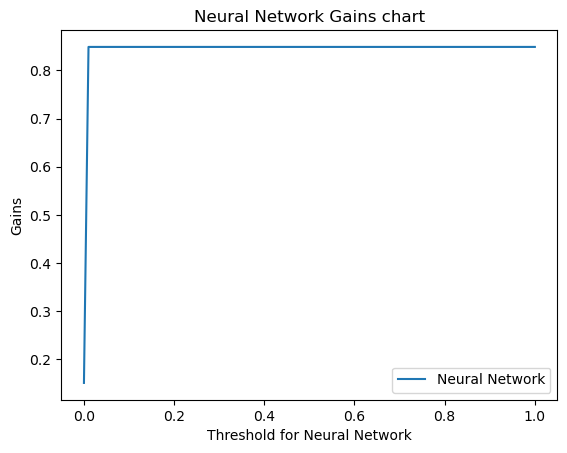

In [21]:
#Gains chart
nn_gains = []
ths3 = np.linspace(0, 1, 100)
for threshold in ths3:
    pr3 = np.where(nn_preds>= threshold, 1, 0)
    cr3 = np.where((pr3 == y_valid))[0]
    nn_gains.append(len(cr3)/len(y_valid))
plt.plot(ths3, nn_gains, label = 'Neural Network')
plt.legend()
plt.xlabel('Threshold for Neural Network')
plt.ylabel('Gains')
plt.title('Neural Network Gains chart')
plt.show()

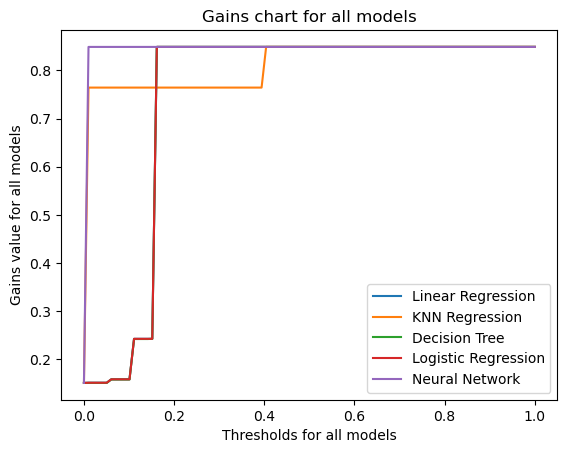

In [25]:
lr = LinearRegression()
knn = KNeighborsRegressor()
t = DecisionTreeRegressor()
lr2 = LogisticRegression()

lr.fit(X_train, y_train) 
knn.fit(X_train, y_train)
t.fit(X_train, y_train)
lr2.fit(X_train, y_train)

lr_preds = lr.predict(X_valid)
knn_preds = knn.predict(X_valid)
t_preds = t.predict(X_valid)
lr2_preds = lr2.predict(X_valid)

lr_gains = []
ths = np.linspace(0, 1, 100)
for threshold in ths:
    preds = np.where(l_predictions >= threshold, 1 ,0)
    cor = np.where((preds == y_valid))[0]
    lr_gains.append(len(cor)/len(y_valid))

knn_g = []
th = np.linspace(0,1,100)
for threshold in th:
    pr = np.where(knn_preds >= threshold, 1, 0)
    cr = np.where((pr == y_valid))[0]
    knn_g.append(len(cr)/len(y_valid))
    
t_gains = []
th = np.linspace(0, 1, 100)
for threshold in th:
    preds = np.where(t_preds >= threshold, 1, 0)
    crt = np.where((preds == y_valid))[0]
    t_gains.append(len(crt)/len(y_valid))

lr2_gains = []
th = np.linspace(0, 1, 100)
for threshold in th:
    preds = np.where(lr_preds >= threshold, 1, 0)
    crr = np.where((preds == y_valid))[0]
    lr2_gains.append(len(crr)/len(y_valid))
    
nn_gains = []
ths3 = np.linspace(0, 1, 100)
for threshold in ths3:
    pr3 = np.where(nn_preds>= threshold, 1, 0)
    cr3 = np.where((pr3 == y_valid))[0]
    nn_gains.append(len(cr3)/len(y_valid))

plt.plot(ths, lr_gains, label = "Linear Regression")
plt.plot(th,knn_g, label = 'KNN Regression')
plt.plot(th, t_gains, label = 'Decision Tree')
plt.plot(th, lr2_gains, label = 'Logistic Regression')
plt.plot(ths3, nn_gains, label = 'Neural Network')
plt.legend()
plt.xlabel('Thresholds for all models')
plt.ylabel('Gains value for all models')
plt.title('Gains chart for all models')
plt.show()